In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Concrete_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
y = y.reshape(len(y),1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
sc_y= StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train=sc_y.fit_transform(y_train)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[35.97 26.06]
 [12.48 10.35]
 [80.98 79.3 ]
 [52.81 74.99]
 [16.9   9.69]
 [48.18 47.1 ]
 [58.41 59.  ]
 [21.83 22.72]
 [66.92 61.89]
 [50.71 52.12]
 [17.29 17.54]
 [48.48 48.15]
 [36.39 38.33]
 [18.91 17.2 ]
 [48.49 56.83]
 [60.   55.25]
 [30.28 33.36]
 [36.33 34.68]
 [56.64 52.61]
 [36.3  39.94]
 [58.94 61.46]
 [26.71 27.63]
 [29.87 32.9 ]
 [55.71 41.64]
 [19.45 17.54]
 [24.49 26.85]
 [57.97 66.9 ]
 [21.82 21.06]
 [60.   61.07]
 [72.42 66.95]
 [18.98 20.87]
 [50.89 48.79]
 [20.71 24.05]
 [36.66 47.81]
 [21.73 21.16]
 [ 9.2   6.94]
 [47.33 28.6 ]
 [24.38 26.31]
 [25.65 33.95]
 [26.86 25.72]
 [52.05 37.8 ]
 [43.35 35.17]
 [25.21 32.24]
 [35.13 37.81]
 [65.49 57.23]
 [45.98 33.4 ]
 [26.82 30.14]
 [44.37 33.8 ]
 [34.36 35.08]
 [50.64 52.91]
 [42.37 40.93]
 [22.16 21.75]
 [24.76 16.5 ]
 [42.84 42.35]
 [54.52 50.94]
 [41.84 64.02]
 [40.88 52.2 ]
 [49.6  53.39]
 [62.61 64.3 ]
 [47.98 44.52]
 [34.85 37.42]
 [16.72 22.14]
 [48.59 62.94]
 [49.46 45.7 ]
 [12.62 14.64]
 [50.87 53.58]
 [38.36 33

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8432895831149392

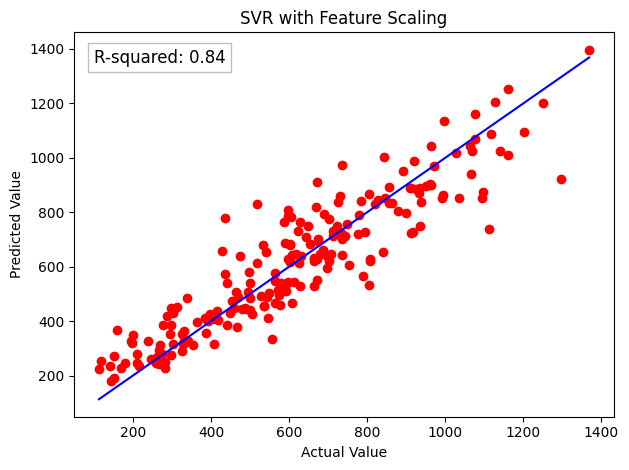

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(sc_y.inverse_transform(y_test.reshape(-1, 1)),sc_y.inverse_transform(y_pred.reshape(-1, 1)),color='red')
plt.plot([sc_y.inverse_transform(y_test.reshape(-1, 1)).min(),sc_y.inverse_transform(y_test.reshape(-1, 1)).max()],[sc_y.inverse_transform(y_test.reshape(-1, 1)).min(),sc_y.inverse_transform(y_test.reshape(-1, 1)).max()],color='blue')
plt.title('SVR with Feature Scaling')
plt.text(100,1350,f'R-squared: {r2_score(y_test, y_pred):.2f}',fontsize=12,color='black',bbox=dict(facecolor='white',edgecolor='gray',alpha=0.5))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.tight_layout()
plt.show()
plt.savefig("SVR_with_fs.png", dpi=300, bbox_inches='tight')